<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_14_RandomForest_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

## Introducción

Los árboles de decisión son modelos que se ajustan muy bien a los datos de entrenamiento; sin embargo, tienen una capacidad limitada para generalizar, lo que los hace susceptibles al **overfitting**, su principal desventaja.  
Para abordar este problema, se desarrolló el algoritmo **Random Forest**, que se basa en dos características principales:

1. Entrenamiento de múltiples árboles utilizando diferentes subconjuntos del conjunto de datos original.
2. Uso de la técnica de **bootstrapping** para generar los subconjuntos de datos para cada árbol.

---

## Bootstrapping en Random Forest

Dado un conjunto de datos con las siguientes características:

| Index | $y$          | $X_1$      | $X_2$      | $X_3$      | $X_4$      |
|-------|--------------|------------|------------|------------|------------|
| 1     | $y^{(1)}$    | $X_1^{1}$  | $X_2^{1}$  | $X_3^{1}$  | $X_4^{1}$  |
| 2     | $y^{(2)}$    | $X_1^{2}$  | $X_2^{2}$  | $X_3^{2}$  | $X_4^{2}$  |
| 3     | $y^{(3)}$    | $X_1^{3}$  | $X_2^{3}$  | $X_3^{3}$  | $X_4^{3}$  |
| 4     | $y^{(4)}$    | $X_1^{4}$  | $X_2^{4}$  | $X_3^{4}$  | $X_4^{4}$  |

### Muestreo para los árboles
El número de árboles en el bosque y los datos que ingresan a cada árbol son hiperparámetros que pueden definirse. Para generar los subconjuntos de datos, se emplea **bootstrapping**, una técnica de muestreo con reposición.

Por ejemplo, si se generan subconjuntos de datos para 10 árboles, el muestreo con reposición podría producir algo como:

```python
import numpy as np
np.random.randint(0, 4, (10, 4))

Salida hipotética

array([[1, 0, 3, 3],
       [2, 1, 2, 0],
       [2, 3, 3, 3],
       [0, 2, 2, 3],
       [2, 0, 3, 3],
       [1, 1, 2, 0],
       [2, 2, 1, 2],
       [3, 0, 1, 0],
       [3, 1, 0, 2],
       [2, 0, 2, 0]])
```
Cada fila del array representa los índices seleccionados para entrenar un árbol. Por ejemplo, el árbol 1 se entrenará con los datos $X_1$, $X_2$, $X_3$, $X_4$ correspondientes a los índices [1, 0, 3, 3].


# Construcción de los Árboles

## Selección aleatoria de características
- En cada nodo de un árbol, se selecciona un subconjunto aleatorio de características para dividir los datos.

## Agregación de árboles
- Una vez entrenados todos los árboles, se combinan mediante un proceso de **agregación**.  
  Cuando se pasa un nuevo dato, cada árbol emite una clasificación, y la decisión final se toma por mayoría de votos.

---

# Relación entre Bagging y Random Forest

- **Bagging:** Combina **agregación** y **bootstrapping**.
- **Random Forest:** Es una extensión de bagging con selección aleatoria de características en cada nodo.

---

# Optimización de Random Forest

La estrategia para optimizar un Random Forest incluye los siguientes pasos:

1. **Fijar el número de árboles y evaluar el error:**  
   Determinar el error como función del número de árboles en el bosque.

2. **Ajustar el número de características:**  
   Con un número fijo de árboles, calcular el error como función del número de características seleccionadas en cada nodo.

3. **Optimizar el criterio de parada:**  
   Ajustar parámetros como el número mínimo de datos en una hoja para reducir el error y mejorar la generalización.

---

# Ventajas de Random Forest

- Reduce el riesgo de overfitting al promediar múltiples árboles.
- Permite identificar las características más importantes del conjunto de datos.

---

# Referencias

1. [Codificando Bits - Random Forest](https://www.youtube.com/watch?v=3pa0vtW64Ic&ab_channel=CodificandoBits)
2. [Wikipedia - Bootstrap Aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
3. [Random Forest Book](http://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf)
4. [Hands-On Machine Learning](https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb)


In [ ]:
#https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb

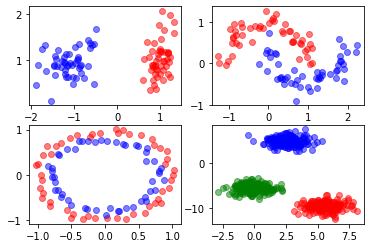

In [ ]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt

# Dataset Toys References
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# Dataset sinteticos
X0, y0 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
X1, y1 = make_moons(n_samples=100, noise=0.15, shuffle=True,  random_state=1)
X2, y2 = make_circles(n_samples=100, noise=0.05, shuffle=True,  random_state=1)
X3, y3 = make_blobs(n_samples=500, centers=3, n_features=2,shuffle=True,
                    random_state=10)

fig, axs = plt.subplots(2,2)

axs[0, 0].plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
axs[0, 0].plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)

# Dataset a moons
axs[0, 1].plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5)
axs[0, 1].plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5)

# Dataset circles
axs[1, 0].plot(X2[:,0][y2==0],X2[:,1][y2==0],"ro", alpha=0.5)
axs[1, 0].plot(X2[:,0][y2==1],X2[:,1][y2==1],"bo", alpha=0.5)

# Dataset circles
axs[1, 1].plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


Laboratorio:

1. Cargar load digitis
```
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()
```

2, Aplicar random foreset usando sklearn

(1797, 64)


<Figure size 432x288 with 0 Axes>

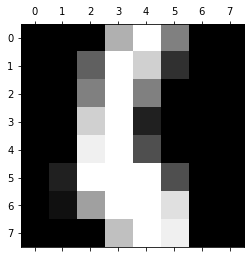

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
#https://en.wikipedia.org/wiki/MNIST_database

In [ ]:
# Solution 1 GPT 3
#write code in python  for clasifier use random forset with mnist dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
clf = RandomForestClassifier(n_estimators=100)
clf.fit(digits.data, digits.target)

#to test
print(clf.predict(digits.data[-5:]))
print(digits.target[-5:])

#importance features
clf.feature_importances_

[9 0 8 9 8]
[9 0 8 9 8]


array([0.00000000e+00, 1.83905540e-03, 2.12313868e-02, 9.58529696e-03,
       1.03064367e-02, 1.89152553e-02, 1.08501548e-02, 7.99571678e-04,
       3.41648193e-05, 8.27657398e-03, 2.65756198e-02, 5.96307865e-03,
       1.49939999e-02, 2.81255767e-02, 5.98545186e-03, 8.17449173e-04,
       6.74086430e-05, 7.64583977e-03, 2.00597956e-02, 2.78438330e-02,
       2.92776472e-02, 5.05400241e-02, 1.05557299e-02, 3.29628388e-04,
       4.95995964e-05, 1.42463899e-02, 4.14634129e-02, 2.44306758e-02,
       3.69125012e-02, 2.72763508e-02, 2.60659298e-02, 0.00000000e+00,
       0.00000000e+00, 2.67050972e-02, 2.84543381e-02, 1.84820336e-02,
       4.32024393e-02, 2.09043216e-02, 2.49742506e-02, 0.00000000e+00,
       1.17445422e-04, 1.01263599e-02, 3.63778573e-02, 3.96988065e-02,
       1.92530127e-02, 1.61834798e-02, 1.85000052e-02, 6.00669498e-05,
       4.12426500e-06, 2.64106187e-03, 1.71760275e-02, 2.10256201e-02,
       1.43195307e-02, 2.44814046e-02, 2.52888593e-02, 2.43633846e-03,
      

In [ ]:
# #write code in python  for mnist dataset  using random forset
# # GPT 3 Code
# #Solution 2
# import numpy as np
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')
# x, y = mnist["data"], mnist["target"]
# import numpy as np
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')
# x, y = mnist["data"], mnist["target"]


# def train_test_split(x, y, test_ratio):
#     shuffled_indices = np.random.permutation(len(x))
#     test_set_size = int(len(x) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return x[train_indices], y[train_indices], x[test_indices], y[test_indices]

# train_set, train_labels, test_set, test_labels = train_test_split(x, y, test_ratio=0.2, random_state=42)



# from sklearn.ensemble import RandomForestClassifier
# forest_clf = RandomForestClassifier(random_state=42)
# forest_clf.fit(train_set, train_labels)
# forest_clf.predict([some_digit])
# forest_clf.predict_proba([some_digit])

# from sklearn.model_selection import cross_val_score
# cross_val_score(forest_clf, train_set, train_labels, cv=3, scoring="accuracy")


# from sklearn.neighbors import KNeighborsClassifier
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(train_set, train_labels)
# knn_clf.predict([some_digit])
# knn_clf.score(test_set, test_labels)

# cross_val_score(knn_clf, train_set, train_labels, cv=3, scoring="accuracy")


# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#  ]
# forest_clf = RandomForestClassifier()
# grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
#                            scoring='neg_mean_squared_error', return_train_score=True)
# grid_search.fit(train_set, train_labels)


# np.sqrt(-grid_search.best_score_)


# grid_search.best_params_

# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances
# extra_attribs = ["rooms_per_hold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# np.argsort(feature)
# sorted(zip(feature_importances, attributes), reverse=True)

TypeError: ignored